# INDIA COVID-19 RECOVERY ANALYSIS

![](https://miro.medium.com/max/24468/1*mUDjPo56_UZ5y2YldOVl3A.jpeg)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../input/coronavirus-covid19-indepth-dataset/covid_india.csv').sort_values('Name of State / UT')
data.head()

,S. No.,Name of State / UT,Active Cases,Cured/Discharged/Migrated,Deaths,Total Confirmed cases
0,1,Andaman and Nicobar,193,6630,113,6936
1,2,Andhra Pradesh,180362,1466990,10634,1657986
2,3,Arunachal Pradesh,3854,22352,111,26317
3,4,Assam,54664,340178,3168,398010
4,5,Bihar,24810,672868,5004,702682


In [3]:
index = ['AN','AD','AR','AS','BR','CH','CG','DNHDD','DL','GA','GJ','HR',
         'HP','JK','JH','KA','KL','LA','LD','MP','MH','MN','ML','MZ','NL',
         'OD','PY','PB','RJ','SK','TN','TS','TR','UP','UK','WB']
data['Code'] = index
data = data.drop('S. No.', axis=1).set_index('Code').iloc[:,[0,4,2,1,3]].rename(
                    columns={'Name of State / UT': 'State/UT',
                            'Total Confirmed cases': 'Confirmed',
                            'Cured/Discharged/Migrated':'Recovered',
                            'Active Cases': 'Active'})
data.head()

,State/UT,Confirmed,Recovered,Active,Deaths
Code,,,,,
AN,Andaman and Nicobar,6936,6630,193,113
AD,Andhra Pradesh,1657986,1466990,180362,10634
AR,Arunachal Pradesh,26317,22352,3854,111
AS,Assam,398010,340178,54664,3168
BR,Bihar,702682,672868,24810,5004


In [4]:
data.shape

(36, 5)

In [5]:
# Checking for null values
data.isna().sum()

State/UT     0
Confirmed    0
Recovered    0
Active       0
Deaths       0
dtype: int64

In [6]:
data.describe()

,Confirmed,Recovered,Active,Deaths
count,3.600000e+01,3.600000e+01,36.000000,36.000000
mean,7.702569e+05,6.993892e+05,61909.000000,8958.666667
std,1.107640e+06,1.015199e+06,95478.669696,16284.617820
min,6.936000e+03,5.404000e+03,193.000000,4.000000
25%,4.434100e+04,3.592650e+04,6436.750000,532.500000
50%,3.667135e+05,3.294335e+05,24942.500000,3510.500000
75%,9.416880e+05,8.737215e+05,52849.000000,9979.250000
max,5.692920e+06,5.307874e+06,372394.000000,93198.000000


## Analysis & Visualizations

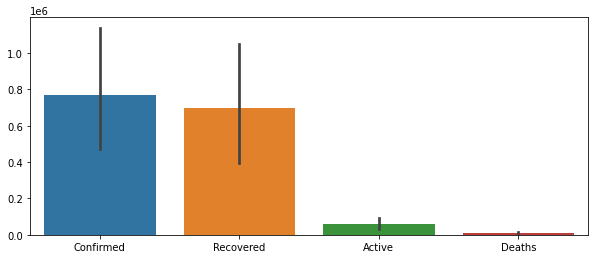

In [7]:
plt.figure(figsize=(10,4))
sns.barplot(data=data)
plt.show()

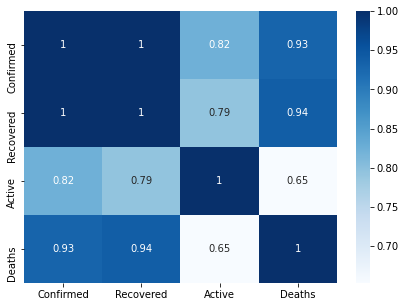

In [8]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.show()

scatterplot for Indian Covid Cases


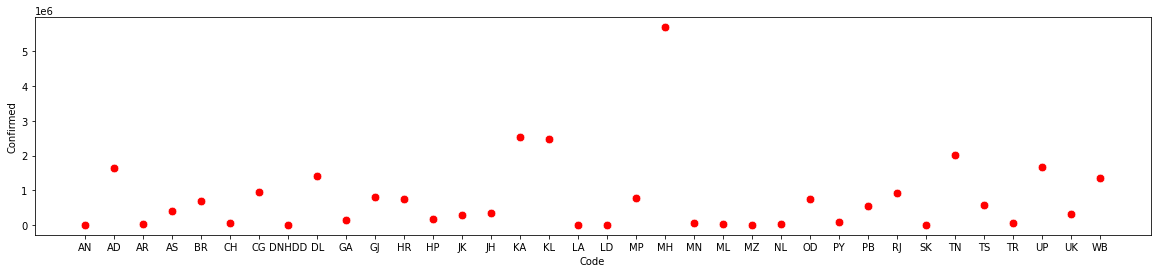

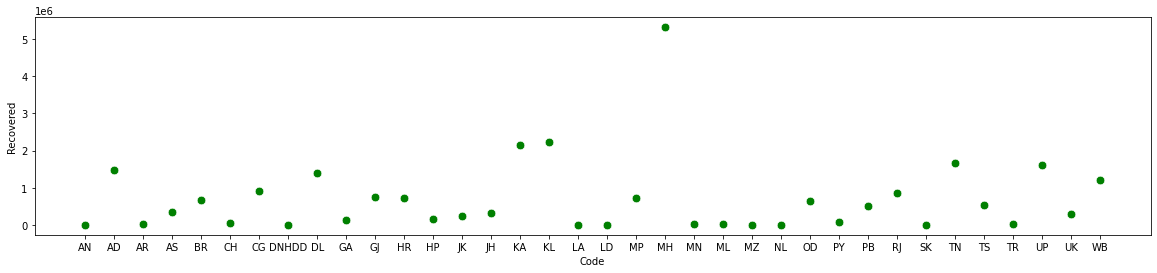

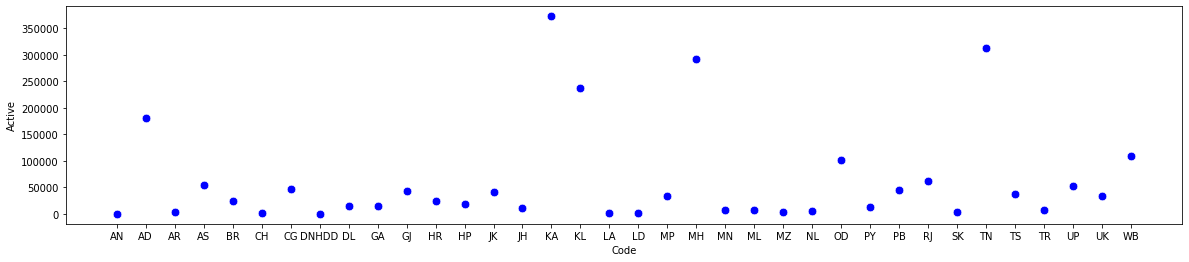

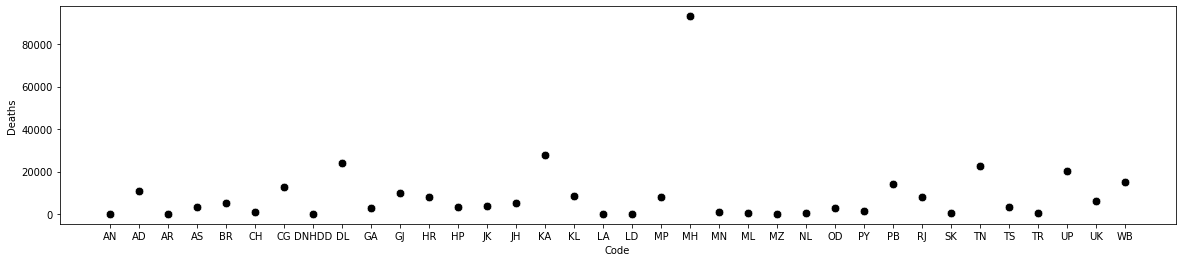

In [9]:
color = ['red','green','blue','black']
print('scatterplot for Indian Covid Cases')
for i in range(1,5):
    plt.figure(figsize=(20,4))
    sns.scatterplot(data.index, data.iloc[:,i], 
                    s=75, color=color[i-1])
    plt.show()

In [10]:
col = data.columns.tolist()
col

['State/UT', 'Confirmed', 'Recovered', 'Active', 'Deaths']

In [11]:
report = {}
for i in range(1,5):
    report[col[i]] = (data.iloc[:,i].sum())
report = pd.DataFrame(report, index=['Total']).T
print('REPORT OF INDIA COVID CASES')
report

REPORT OF INDIA COVID CASES


,Total
Confirmed,27729247
Recovered,25178011
Active,2228724
Deaths,322512


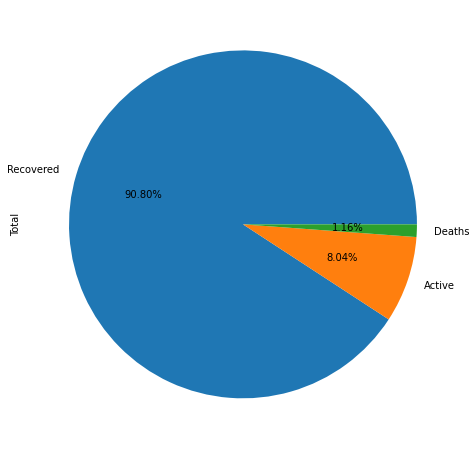

In [12]:
plt.figure(figsize=(8,8))
report.iloc[1:,0].plot.pie(autopct='%1.2f%%')
plt.show()

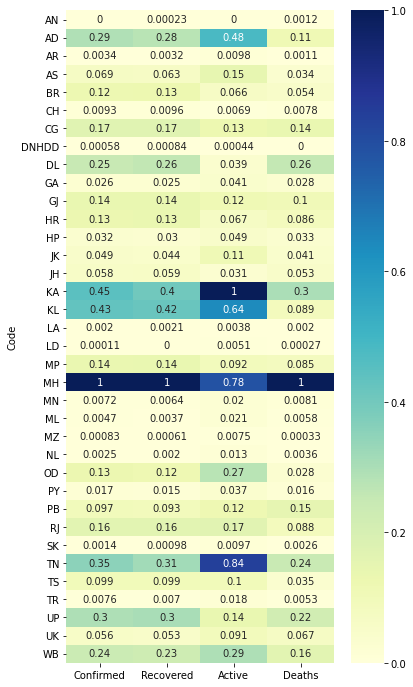

In [13]:
ndata = data.iloc[:,1:]
norm_data = (ndata - ndata.min()) / (ndata.max() - ndata.min())
plt.figure(figsize=(6,12))
sns.heatmap(norm_data, cmap='YlGnBu', annot=True)
plt.show()

## Analysis on Confirmed Cases

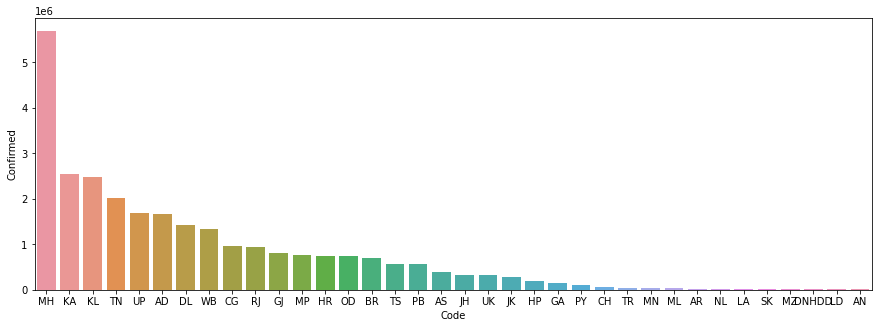

In [14]:
plt.figure(figsize=(15,5))
data = data.sort_values('Confirmed', ascending=False)
sns.barplot(data.index, data['Confirmed'])
plt.show()

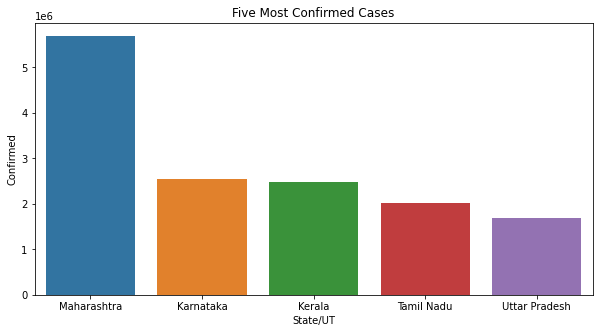

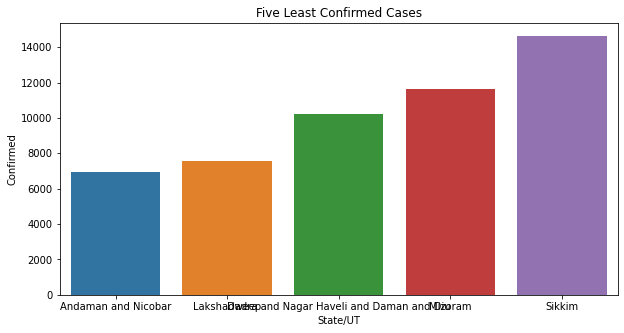

In [15]:
plt.figure(figsize=(10,5))
plt.title('Five Most Confirmed Cases')
sns.barplot(data['State/UT'][:5], data['Confirmed'][:5])
plt.show()
plt.figure(figsize=(10,5))
plt.title('Five Least Confirmed Cases')
sns.barplot(data['State/UT'][-1:-6:-1], data['Confirmed'][-1:-6:-1])
plt.show()

MOST CONFIRMED CASES:
---------------------
State/UT     Maharashtra
Confirmed        5692920
Recovered        5307874
Active            291848
Deaths             93198
Name: MH, dtype: object


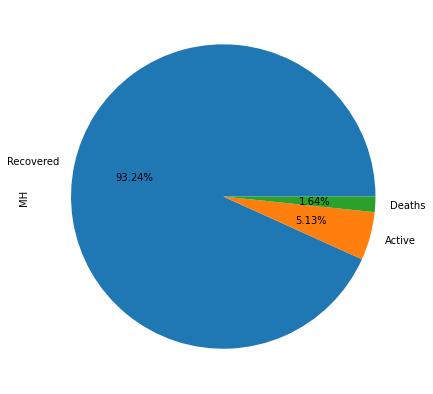

LEAST CONFIRMED CASES:
----------------------
State/UT     Andaman and Nicobar
Confirmed                   6936
Recovered                   6630
Active                       193
Deaths                       113
Name: AN, dtype: object


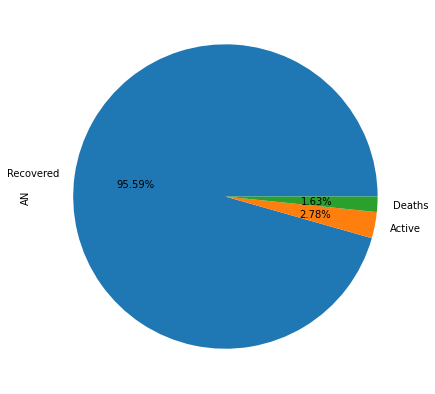

In [16]:
print('MOST CONFIRMED CASES:')
print('---------------------')
print(data.iloc[0,:])
plt.figure(figsize=(7,7))
data.iloc[0,2:].plot(kind='pie', autopct='%1.2f%%')
plt.show()
print('LEAST CONFIRMED CASES:')
print('----------------------')
print(data.iloc[-1,:])
plt.figure(figsize=(7,7))
data.iloc[-1,2:].plot(kind='pie', autopct='%1.2f%%')
plt.show()

In [17]:
conf = data.iloc[:,0:2]
conf['Percentage'] = conf['Confirmed']/conf['Confirmed'].sum()*100
conf

,State/UT,Confirmed,Percentage
Code,,,
MH,Maharashtra,5692920,20.530381
KA,Karnataka,2546821,9.184602
KL,Kerala,2470872,8.910707
TN,Tamil Nadu,2009700,7.247582
UP,Uttar Pradesh,1686138,6.080720
AD,Andhra Pradesh,1657986,5.979196
DL,Delhi,1423690,5.134254
WB,West Bengal,1343442,4.844856
CG,Chhattisgarh,965208,3.480830


## Analysis on Recovered Cases 

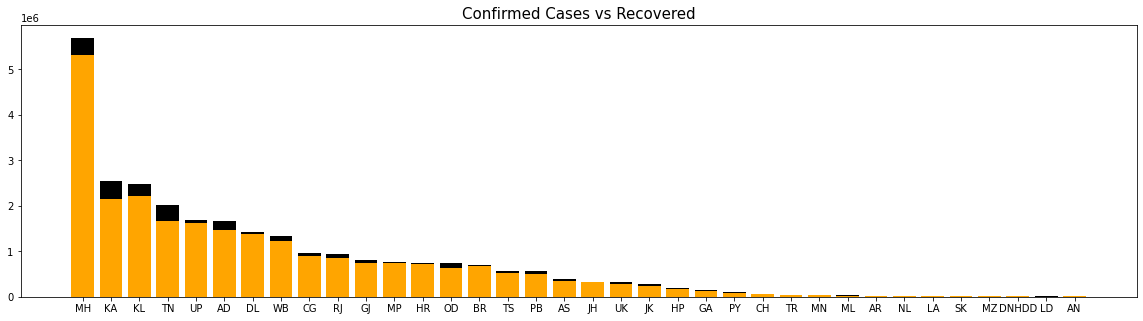

In [18]:
fig=plt.figure(figsize=(20,5))
plt.title('Confirmed Cases vs Recovered', fontsize=15)
plt.bar(data.index,data['Confirmed'], color='black')
plt.bar(data.index,data['Recovered'], color='orange')
plt.show()

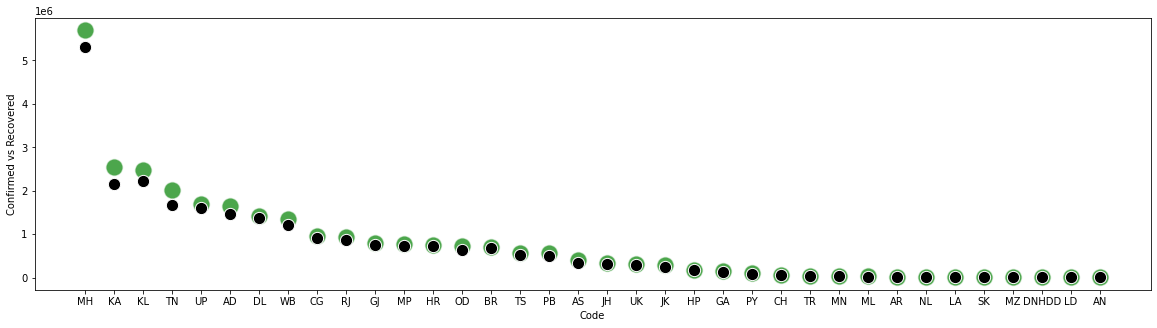

In [19]:
plt.figure(figsize=(20,5))
plt.ylabel('Confirmed vs Recovered')
sns.scatterplot(data.index, data.Confirmed, s=300, color='green', alpha=0.7)
sns.scatterplot(data.index, data.Recovered, s=150, color='black')
plt.show()

In [20]:
rec = data.drop(['Active','Deaths'], axis=1).sort_values('Recovered', ascending=False)
rec['Percentage'] = rec['Recovered']/rec['Confirmed']*100
rec.head(10)

,State/UT,Confirmed,Recovered,Percentage
Code,,,,
MH,Maharashtra,5692920,5307874,93.236406
KL,Kerala,2470872,2224405,90.025100
KA,Karnataka,2546821,2146621,84.286293
TN,Tamil Nadu,2009700,1674539,83.322834
UP,Uttar Pradesh,1686138,1613841,95.712273
AD,Andhra Pradesh,1657986,1466990,88.480240
DL,Delhi,1423690,1385158,97.293512
WB,West Bengal,1343442,1218516,90.701050
CG,Chhattisgarh,965208,905361,93.799575


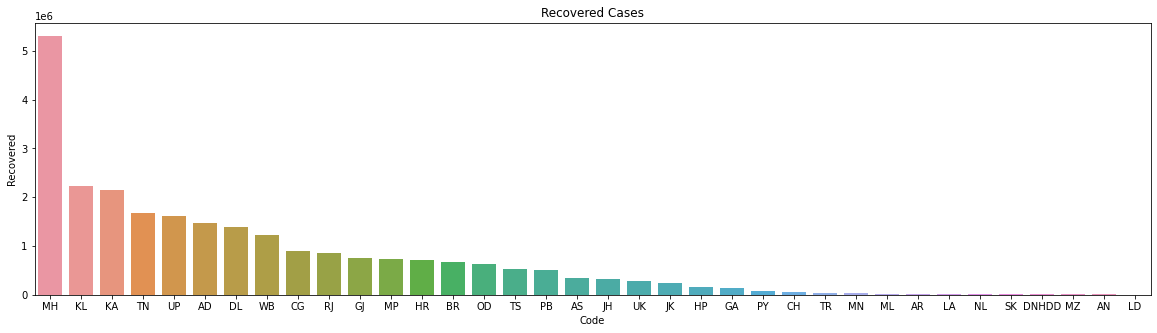

In [21]:
plt.figure(figsize=(20,5))
sns.barplot(rec.index, rec['Recovered'])
plt.title('Recovered Cases')
plt.show()

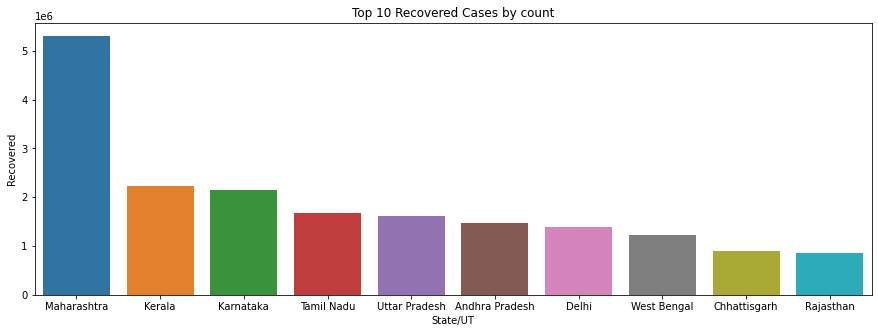

In [22]:
plt.figure(figsize=(15,5))
sns.barplot(rec['State/UT'][:10], rec['Recovered'][:10])
plt.title('Top 10 Recovered Cases by count')
plt.show()

In [23]:
top10 = rec.sort_values('Percentage', ascending=False).head(10)
top10

,State/UT,Confirmed,Recovered,Percentage
Code,,,,
DL,Delhi,1423690,1385158,97.293512
DNHDD,Dadra and Nagar Haveli and Daman and Diu,10207,9845,96.453414
BR,Bihar,702682,672868,95.757113
UP,Uttar Pradesh,1686138,1613841,95.712273
HR,Haryana,752069,718959,95.597478
AN,Andaman and Nicobar,6936,6630,95.588235
JH,Jharkhand,335417,318689,95.012775
MP,Madhya Pradesh,775709,733496,94.558140
CH,Chandigarh,59577,56084,94.136999


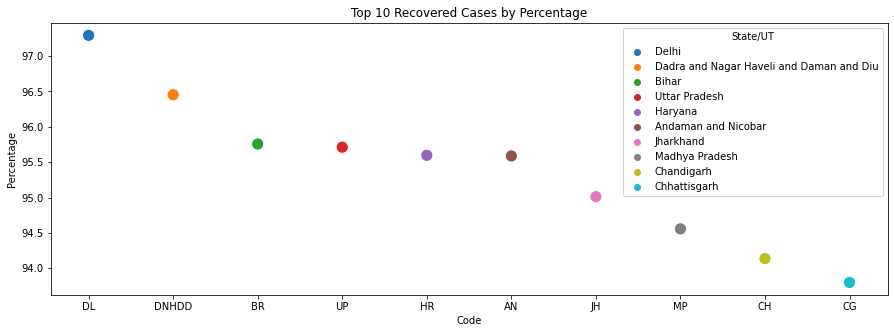

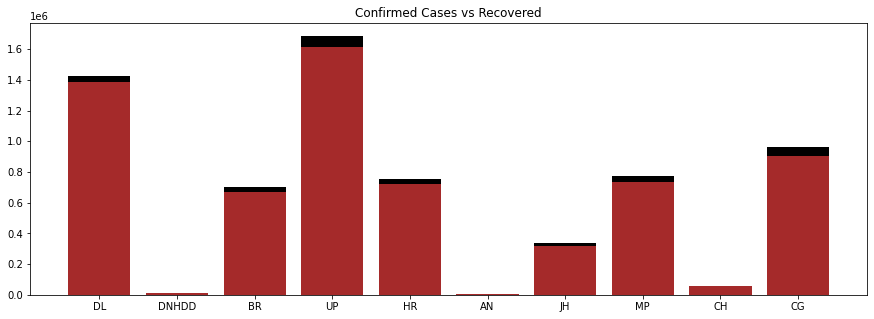

In [24]:
plt.figure(figsize=(15,5))
plt.title('Top 10 Recovered Cases by Percentage')
sns.scatterplot(top10.index, top10['Percentage'], 
                hue=top10['State/UT'], s=150)
plt.show()
fig=plt.figure(figsize=(15,5))
plt.title('Confirmed Cases vs Recovered')
plt.bar(top10.index,top10['Confirmed'], color='black')
plt.bar(top10.index,top10['Recovered'], color='brown')
plt.show()

## Thank You!